In [ ]:
# import numpy as np  #linear algebra
#import pandas as pd #data processing,csv file I/O
!pip install pyforest



In [8]:
data = pd.read_csv(r"C:\Users\matha\Downloads\archive (6).zip")
data

<IPython.core.display.Javascript object>

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
data.shape  #checking how many rows and columns

(418, 12)

In [10]:
data.isna().sum()   #checking how many null values present in data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [13]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
#import label encoder
from sklearn import preprocessing

#label_encoder objects knows how to understand word labeld
label_encoder = preprocessing.LabelEncoder()

#Encode label in column Gender
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Sex'].value_counts()  #converting male as 1 and  female as 2

1    266
0    152
Name: Sex, dtype: int64

In [15]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


In [16]:
data=data.drop(['Ticket','Cabin','Name'],axis=1) #droping the unwanted columns
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,34.5,0,0,7.8292,Q
1,893,1,3,0,47.0,1,0,7.0000,S
2,894,0,2,1,62.0,0,0,9.6875,Q
3,895,0,3,1,27.0,0,0,8.6625,S
4,896,1,3,0,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,1,NaN,0,0,8.0500,S
414,1306,1,1,0,39.0,0,0,108.9000,C
415,1307,0,3,1,38.5,0,0,7.2500,S
416,1308,0,3,1,NaN,0,0,8.0500,S


In [17]:
data['Age'].median()

27.0

In [18]:
data['Age']=data['Age'].fillna(value=27)   #filling the null values using the fillna()
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,34.5,0,0,7.8292,Q
1,893,1,3,0,47.0,1,0,7.0000,S
2,894,0,2,1,62.0,0,0,9.6875,Q
3,895,0,3,1,27.0,0,0,8.6625,S
4,896,1,3,0,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,1,27.0,0,0,8.0500,S
414,1306,1,1,0,39.0,0,0,108.9000,C
415,1307,0,3,1,38.5,0,0,7.2500,S
416,1308,0,3,1,27.0,0,0,8.0500,S


In [19]:
data['Age'].isna().sum()

0

In [20]:
#  import pandas_profiling
# data.profile_report()


In [21]:
data.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [22]:
data['Fare'].value_counts()

7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: Fare, Length: 169, dtype: int64

In [23]:
data['Fare']=data['Fare'].fillna(value=7.7500)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,34.5,0,0,7.8292,Q
1,893,1,3,0,47.0,1,0,7.0000,S
2,894,0,2,1,62.0,0,0,9.6875,Q
3,895,0,3,1,27.0,0,0,8.6625,S
4,896,1,3,0,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,1,27.0,0,0,8.0500,S
414,1306,1,1,0,39.0,0,0,108.9000,C
415,1307,0,3,1,38.5,0,0,7.2500,S
416,1308,0,3,1,27.0,0,0,8.0500,S


In [24]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [25]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,34.5,0,0,7.8292,Q
1,893,1,3,0,47.0,1,0,7.0000,S
2,894,0,2,1,62.0,0,0,9.6875,Q
3,895,0,3,1,27.0,0,0,8.6625,S
4,896,1,3,0,22.0,1,1,12.2875,S


In [26]:
#import label encoder
from sklearn import preprocessing

#label_encoder object knows how to understand word labels
label_encoder = preprocessing.LabelEncoder()

#Encode labels in column 'Gender'
data['Embarked']=label_encoder.fit_transform(data['Embarked'])
data['Embarked'].value_counts()

2    270
0    102
1     46
Name: Embarked, dtype: int64

In [27]:
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import figure
#style.use('fivethirtyeight')

In [28]:
import seaborn as sn
import pandas as pd
import numpy as pd

In [29]:
!pip install seaborn
import seaborn as sns

In [30]:
data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

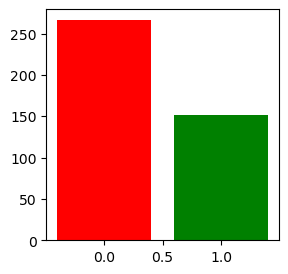

In [31]:
plt.figure(figsize=(3,3))
plt.bar(list(data['Survived'].value_counts().keys()),list(data['Survived'].value_counts()),color=['r','g'])
plt.show()

In [32]:
data['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

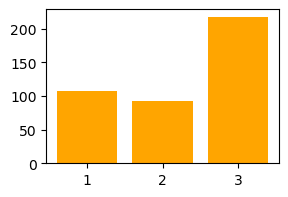

In [33]:
plt.figure(figsize=(3,2))
plt.bar(list(data['Pclass'].value_counts().keys()),list(data['Pclass'].value_counts()),color='orange')
plt.show()

In [34]:
data['Sex'].value_counts()

1    266
0    152
Name: Sex, dtype: int64

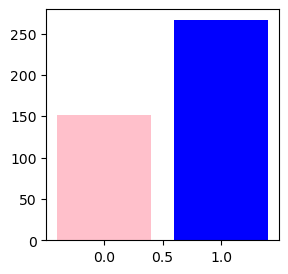

In [35]:
plt.figure(figsize=(3,3))
plt.bar(list(data['Sex'].value_counts().keys()),list(data['Sex'].value_counts()),color=('blue','pink'))
plt.show()

In [36]:
data['Embarked'].value_counts()

2    270
0    102
1     46
Name: Embarked, dtype: int64

In [37]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,34.5,0,0,7.8292,1
1,893,1,3,0,47.0,1,0,7.0000,2
2,894,0,2,1,62.0,0,0,9.6875,1
3,895,0,3,1,27.0,0,0,8.6625,2
4,896,1,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,1,27.0,0,0,8.0500,2
414,1306,1,1,0,39.0,0,0,108.9000,0
415,1307,0,3,1,38.5,0,0,7.2500,2
416,1308,0,3,1,27.0,0,0,8.0500,2


In [42]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.023245,-0.026751,0.023245,-0.031447,0.003818,0.043080,0.008767,0.040699
Survived,-0.023245,1.000000,-0.108615,-1.000000,0.008035,0.099943,0.159120,0.192229,-0.076281
Pclass,-0.026751,-0.108615,1.000000,0.108615,-0.467853,0.001087,0.018721,-0.577491,0.227983
Sex,0.023245,-1.000000,0.108615,1.000000,-0.008035,-0.099943,-0.159120,-0.192229,0.076281
Age,-0.031447,0.008035,-0.467853,-0.008035,1.000000,-0.071197,-0.043731,0.341614,-0.148051
SibSp,0.003818,0.099943,0.001087,-0.099943,-0.071197,1.000000,0.306895,0.172034,0.052708
Parch,0.043080,0.159120,0.018721,-0.159120,-0.043731,0.306895,1.000000,0.230411,0.054577
Fare,0.008767,0.192229,-0.577491,-0.192229,0.341614,0.172034,0.230411,1.000000,-0.257793
Embarked,0.040699,-0.076281,0.227983,0.076281,-0.148051,0.052708,0.054577,-0.257793,1.000000


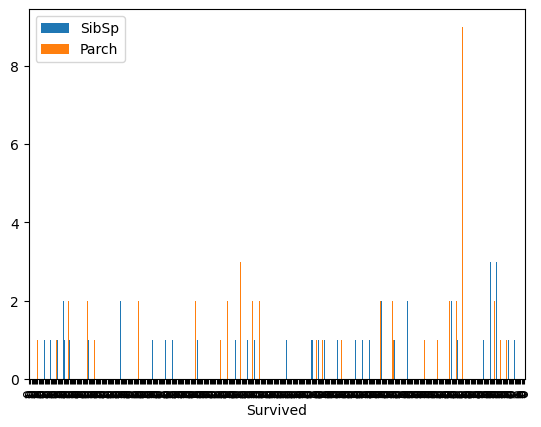

In [41]:
data.plot(x='Survived',y=['SibSp','Parch'], kind='bar')
plt.show()

In [43]:
correlation=data.corr()
correlation['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.192229
Parch          0.159120
SibSp          0.099943
Age            0.008035
PassengerId   -0.023245
Embarked      -0.076281
Pclass        -0.108615
Sex           -1.000000
Name: Survived, dtype: float64

<Axes: >

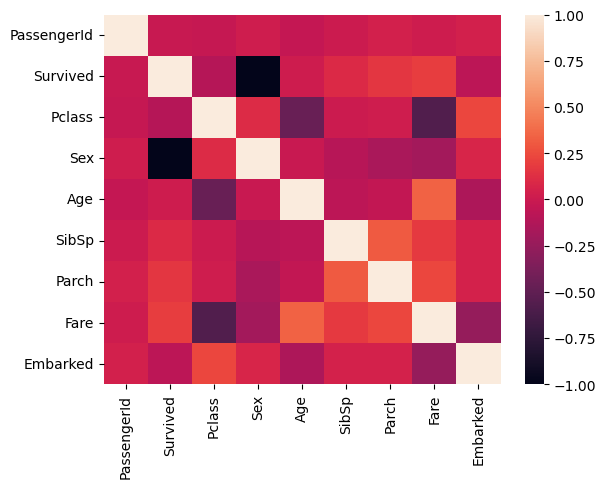

In [44]:
sns.heatmap(data.corr())

In [45]:
correlation['Fare'].sort_values(ascending=False)
correlation['Fare']

PassengerId    0.008767
Survived       0.192229
Pclass        -0.577491
Sex           -0.192229
Age            0.341614
SibSp          0.172034
Parch          0.230411
Fare           1.000000
Embarked      -0.257793
Name: Fare, dtype: float64

In [46]:
data['Family']=data['SibSp']+data['Parch']+1
data=data.drop(['SibSp','Parch'],axis=1)
data=data.drop('PassengerId',axis=1)
data=data.drop('Embarked',axis=1)
data

,Survived,Pclass,Sex,Age,Fare,Family
0,0,3,1,34.5,7.8292,1
1,1,3,0,47.0,7.0000,2
2,0,2,1,62.0,9.6875,1
3,0,3,1,27.0,8.6625,1
4,1,3,0,22.0,12.2875,3
...,...,...,...,...,...,...
413,0,3,1,27.0,8.0500,1
414,1,1,0,39.0,108.9000,1
415,0,3,1,38.5,7.2500,1
416,0,3,1,27.0,8.0500,1


In [47]:
data

,Survived,Pclass,Sex,Age,Fare,Family
0,0,3,1,34.5,7.8292,1
1,1,3,0,47.0,7.0000,2
2,0,2,1,62.0,9.6875,1
3,0,3,1,27.0,8.6625,1
4,1,3,0,22.0,12.2875,3
...,...,...,...,...,...,...
413,0,3,1,27.0,8.0500,1
414,1,1,0,39.0,108.9000,1
415,0,3,1,38.5,7.2500,1
416,0,3,1,27.0,8.0500,1


In [48]:
x=data.drop('Survived',axis=1).values
y=data['Survived'].values

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
lr=LogisticRegression()
lr.fit(x_train,y_train)  #sending data to train 70%
lrpred=lr.predict(x_test)

In [53]:
accuracy_score(y_test,lrpred)

1.0

In [56]:
from sklearn.model_selection import GridSearchCV

# Creating the hyperparameter grid
c_space = np.logspace(-5,8,15)
param_grid = {'C': c_space}

#Intantiating the GridSearchCv object
logreg_cv = GridSearchCV(lr, param_grid, cv = 5)

logreg_cv.fit(x_train,y_train)

# print the tuned parameters and score
print("Tuned Logistic Regression Parameters:{}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

<IPython.core.display.Javascript object>

Tuned Logistic Regression Parameters:{'C': 0.4393970560760795}
Best score is 1.0
